# What sells a car?

Hundreds of free advertisements for vehicles are published on your site every day. and i need to study data collected over the last few years and determine which factors influence the price of a vehicle.

the purpose of the project to test 4 hypotheses about the factors influence the price of a vehicle.
we will use the data to test the hypotheses about the relationship between a certain Vehicle data and how those characteristic affect the price 
**Test five hypotheses:**

1.the age of the vehicle affect the price .<br>
2.mileage for the vehicle affect the price.<br>
3.the condition of the vehicle affect the price.<br>
4.the drivers examines the transmission of vehicle and accordingly considers the price.<br>
5.the color of the vehicle affect the price.<br> 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data file into a DataFrame
try:
    vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')
except:
    vehicles_us = pd.read_csv(r'C:\Users\Alar\Downloads\vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame

vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
vehicles_us.sample(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
40460,7900,2011.0,chevrolet equinox,excellent,4.0,gas,0.0,automatic,wagon,black,NaN,2019-03-29,41
3163,17888,2011.0,jeep wrangler unlimited,excellent,6.0,gas,119548.0,automatic,SUV,NaN,1.0,2019-02-01,62
35168,5000,1994.0,chevrolet suburban,good,8.0,gas,210000.0,automatic,SUV,black,1.0,2018-06-22,30
24746,65,1995.0,chevrolet camaro,excellent,8.0,gas,159000.0,automatic,coupe,blue,NaN,2018-06-11,2
24688,8450,2011.0,chevrolet silverado,excellent,8.0,gas,183000.0,automatic,truck,green,1.0,2019-03-12,47
2563,24999,2006.0,chevrolet silverado 2500hd,excellent,8.0,diesel,123188.0,automatic,truck,white,1.0,2018-10-12,79
19610,6600,2006.0,dodge charger,good,8.0,gas,153238.0,automatic,sedan,NaN,NaN,2018-10-21,8
33235,9500,2013.0,chevrolet equinox,excellent,6.0,gas,133000.0,automatic,SUV,NaN,1.0,2018-12-18,3
14981,1000,2011.0,nissan murano,like new,6.0,gas,92000.0,automatic,SUV,black,1.0,2018-08-10,51
26589,7995,2013.0,kia soul,good,4.0,gas,116515.0,other,SUV,white,NaN,2018-05-06,88


 **Conclusions**<br>
Each row in the table stores data on a ads. the columns have information about the vehicle, like model, condition, clinders etc.

It's clear that the data is sufficient to test the hypotheses. However, there are missing values in several columns, we can see that some columns should change there type, like model_year it's float64 type also date_posted column should be datetime .
Also in price column we can see some rows with value 1 witch doesn't make sense that a price for a car is 1

To move forward, we need to preprocess the data.

In [5]:
 vehicles_us.count().idxmin()

'is_4wd'

In [6]:
len(vehicles_us)

51525

**there are several columns with missing values, such as model_year, cylinders, odometer, paint_color and is_4wd.
as we see is_4wd has the most missing values** 

### Conclusions and further steps

**Each row in the table stores data on an ad. Some columns have information about the car and specific details, and some columns about the ad, like when [date_posted] or[days_listed] And also we can see in price column that we need to check the factors that influence on it.<br>**

**First, we need to deal with missing values; we need to decide how to fill those missing values.<br>
Next, we should check if we have outliers in our data and what we can do with those outliers to prevent them from affecting our analysis.<br>**


In [7]:
vehicles_us.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
vehicles_us.isna().mean()*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [9]:
pd.DataFrame(vehicles_us.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_4wd,50.369723
paint_color,17.985444
odometer,15.316836
cylinders,10.208637
model_year,7.023775
days_listed,0.000000
date_posted,0.000000
type,0.000000
transmission,0.000000
fuel,0.000000


In [10]:
vehicles_us.duplicated().sum()

0

there is no duplicate rows in the data 

## Treat missing values 

In [11]:
vehicles_us[vehicles_us['model_year'].isnull()].head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [12]:
vehicles_us['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [13]:
relevant_years = vehicles_us.query('model_year > 1992')
group_years = relevant_years.groupby('model')['model_year'].median()

for i in group_years.index:
    vehicles_us.loc[(vehicles_us['model'] == i) & (vehicles_us['model_year'].isnull()), 'model_year'] = group_years[i]
vehicles_us['model_year'] = vehicles_us['model_year'].astype(int)
vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int32  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 4.9+ MB


In [14]:
vehicles_us.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

filling missing values for cylinders :<br>
i chose to fill the missing values according to model and model year

In [15]:
vehicles_us['cylinders']= vehicles_us.groupby(['model', 'model_year'])['cylinders'].transform(
    lambda grp: grp.fillna(np.median(grp))
)
for row in vehicles_us:
    try:
        vehicles_us['cylinders']=vehicles_us['cylinders'].astype(int)
    except:
        vehicles_us['cylinders']=vehicles_us.groupby(['model', 'model_year'])['cylinders'].fillna(method='ffill')

In [16]:
vehicles_us.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders         230
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [17]:
vehicles_us['cylinders'].isna().mean()*100

0.4463852498786997

In [18]:
vehicles_us["cylinders"] = vehicles_us["cylinders"].fillna(100)

In [19]:
vehicles_us = vehicles_us.dropna(subset=['cylinders']).reset_index(drop=True)

In [20]:
vehicles_us['cylinders'].value_counts()

8.0      17557
6.0      17358
4.0      15430
10.0       609
5.0        301
100.0      230
3.0         36
12.0         4
Name: cylinders, dtype: int64

filling missing values for odometer:<br>
i chose to fill the missing values according to model_year but this time i chose the median to prevent outlier 

In [21]:
vehicles_us['odometer'] = vehicles_us.groupby(['model_year'])['odometer'].transform('median')

In [22]:
vehicles_us.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            1
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [23]:
odometer_missing = vehicles_us[vehicles_us['odometer'].isnull()].head()
odometer_missing 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [24]:
vehicles_us['model_year'].value_counts() 

2011    4017
2013    3994
2012    3982
2014    3540
2008    3486
        ... 
1948       1
1961       1
1936       1
1949       1
1929       1
Name: model_year, Length: 68, dtype: int64

we can see that there is one row with year 1929 that we couldnt fill the missing value in odomoter in the same row because it's the only value under this year, and there is no data that we can calculate the median to fill the missing value <br> I chose to delete this row

In [25]:
vehicles_us = vehicles_us.drop(vehicles_us.index[vehicles_us['model_year'] == 1929.0])

In [26]:
vehicles_us.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25952
date_posted         0
days_listed         0
dtype: int64

for paint_color i chose to fill the missing values with 'unknown' 

In [27]:
vehicles_us['paint_color'] = vehicles_us['paint_color'].fillna('unknown') 

In [28]:
vehicles_us.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25952
date_posted         0
days_listed         0
dtype: int64

now we need to deal with missing values in is_4wd

In [29]:
vehicles_us['is_4wd'].value_counts() 

1.0    25572
Name: is_4wd, dtype: int64

I assume that when filling out the ad, those who have such a 4WD vehicle entered 1.0 and those who do not have left the field empty, i chose to fill the empty rows with 0.0 

In [30]:
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].fillna(0.0) 

In [31]:
vehicles_us['is_4wd'].value_counts() 

0.0    25952
1.0    25572
Name: is_4wd, dtype: int64

In [32]:
vehicles_us.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

the price column has some rows with value 1 witch doesn't make sense we need to check 

In [33]:
vehicles_us['price'].value_counts().sort_values()

7455      1
2348      1
195       1
190       1
8349      1
       ... 
3500    620
4995    624
5995    655
6995    719
1       798
Name: price, Length: 3443, dtype: int64

In [34]:
(vehicles_us['price'].value_counts()/len(vehicles_us))*100

1        1.548793
6995     1.395466
5995     1.271252
4995     1.211086
3500     1.203323
           ...   
58500    0.001941
3993     0.001941
32987    0.001941
3744     0.001941
7455     0.001941
Name: price, Length: 3443, dtype: float64

we can see that both rows with value 1 and 340 is less than 2% , i choose to drop all those rows 

In [35]:
vehicles_us = vehicles_us.drop(vehicles_us.index[vehicles_us['price'] == 1])

In [36]:
vehicles_us = vehicles_us.drop(vehicles_us.index[vehicles_us['price'] == 340])

In [37]:
vehicles_us['price'].value_counts

<bound method IndexOpsMixin.value_counts of 0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, Length: 50725, dtype: int64>

## Fix data types

In [38]:
vehicles_us.dtypes

price             int64
model_year        int32
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

there are some columns that we should change there types 

In [39]:
vehicles_us['model_year'] = vehicles_us['model_year'].astype('int')

In [40]:
vehicles_us['date_posted'] = pd.to_datetime(vehicles_us['date_posted'], format='%Y-%m-%d')

In [41]:
vehicles_us['cylinders'] = vehicles_us['cylinders'].astype('int')

In [42]:
vehicles_us.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [43]:
vehicles_us['is_4wd'] = vehicles_us['is_4wd'].astype('bool')

In [44]:
vehicles_us.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [45]:
# Add datetime values for when the ad was placed
vehicles_us['weekday'] = vehicles_us['date_posted'].dt.weekday
vehicles_us['weekday'].value_counts()


3    7400
5    7268
6    7231
4    7228
0    7212
1    7201
2    7185
Name: weekday, dtype: int64

In [46]:
vehicles_us['month'] = vehicles_us['date_posted'].dt.month
vehicles_us['month'].value_counts()

10    4572
3     4483
12    4481
5     4430
8     4418
7     4408
1     4385
9     4382
11    4286
6     4149
2     3955
4     2776
Name: month, dtype: int64

In [47]:
vehicles_us['year_ad'] = vehicles_us['date_posted'].dt.year
vehicles_us['year_ad'].value_counts()

2018    35126
2019    15599
Name: year_ad, dtype: int64

In [48]:
# Add the vehicle's age when the ad was placed
vehicles_us['vehicle_age'] = vehicles_us['year_ad'] - vehicles_us['model_year']
vehicles_us['vehicle_age'].value_counts()               


7     4048
6     3922
5     3810
4     3464
8     3389
      ... 
59       1
63       1
82       1
69       1
43       1
Name: vehicle_age, Length: 67, dtype: int64

In [49]:
# Add the vehicle's average mileage per year
vehicles_us['average_mileage'] = (vehicles_us['odometer']/ vehicles_us['vehicle_age'])
vehicles_us['average_mileage'].value_counts()

17575.000000    2793
19968.000000    2752
18333.333333    2702
22500.000000    2414
13997.300000    2396
                ... 
271.186441         1
1267.441860        1
1157.894737        1
365.853659         1
26.086957          1
Name: average_mileage, Length: 122, dtype: int64

In [50]:
vehicles_us['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [51]:
condition_dic={
    'slavage':0,
    'fair':1,
    'good':2,
    'excellent':3,
    'like new':4,
    'new':5
}

In [52]:
condition_dic.keys()

dict_keys(['slavage', 'fair', 'good', 'excellent', 'like new', 'new'])

In [53]:
condition_dic.values()

dict_values([0, 1, 2, 3, 4, 5])

In [54]:
condition_dic['good']

2

In [55]:
condition_dic.get('good')

2

In [56]:
def replace_condition(x):
    condition1 = x['condition']
    if condition1 == 'slavage':
        return 0
    elif condition1 == 'fair':
        return 1
    elif condition1 == 'good':
        return 2
    elif condition1 == 'excellent':
        return 3
    elif condition1 == 'like new':
        return 4
    else:
        return 5 

In [57]:
vehicles_us['condition_cate']= vehicles_us.apply(replace_condition, axis=1)
vehicles_us.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate
0,9400,2011,bmw x5,good,6,gas,123025.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,17575.0000,2
1,25500,2011,ford f-150,good,6,gas,123025.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,17575.0000,2
2,5500,2013,hyundai sonata,like new,4,gas,99840.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,16640.0000,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,10087.3125,1
4,14900,2017,chrysler 200,excellent,4,gas,41000.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,20500.0000,3


## Check clean data

In [58]:
# print the general/summary information about the DataFrame

vehicles_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50725 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            50725 non-null  int64         
 1   model_year       50725 non-null  int32         
 2   model            50725 non-null  object        
 3   condition        50725 non-null  object        
 4   cylinders        50725 non-null  int32         
 5   fuel             50725 non-null  object        
 6   odometer         50725 non-null  float64       
 7   transmission     50725 non-null  object        
 8   type             50725 non-null  object        
 9   paint_color      50725 non-null  object        
 10  is_4wd           50725 non-null  bool          
 11  date_posted      50725 non-null  datetime64[ns]
 12  days_listed      50725 non-null  int64         
 13  weekday          50725 non-null  int64         
 14  month            50725 non-null  int64

In [59]:
# a sample of data

vehicles_us.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate
45369,20488,2017,ford mustang,like new,4,gas,41000.0,automatic,coupe,grey,False,2019-03-06,7,2,3,2019,2,2.050000e+04,4
22932,9999,1998,jeep wrangler,excellent,6,gas,170592.0,manual,SUV,unknown,True,2018-12-21,12,4,12,2018,20,8.529600e+03,3
38674,13047,2006,jeep wrangler,excellent,6,gas,151224.0,automatic,SUV,black,True,2018-11-28,33,2,11,2018,12,1.260200e+04,3
41945,2795,2005,toyota camry le,good,4,gas,153069.5,automatic,sedan,white,False,2018-06-15,79,4,6,2018,13,1.177458e+04,2
37988,35995,2017,gmc yukon,excellent,8,gas,41000.0,automatic,SUV,red,True,2018-10-14,67,6,10,2018,1,4.100000e+04,3
44285,6999,2010,nissan maxima,excellent,4,gas,127168.5,automatic,sedan,blue,False,2019-04-13,38,5,4,2019,9,1.412983e+04,3
44719,24950,2011,chevrolet corvette,like new,8,gas,123025.0,automatic,coupe,grey,False,2018-09-14,79,4,9,2018,7,1.757500e+04,4
41605,17500,2014,ford explorer,good,6,gas,90000.0,automatic,SUV,silver,True,2018-09-26,40,2,9,2018,4,2.250000e+04,2
19162,19900,2002,gmc sierra 2500hd,excellent,8,gas,160000.0,automatic,truck,white,True,2018-05-31,44,3,5,2018,16,1.000000e+04,3
40758,14995,2009,chevrolet suburban,good,8,gas,131507.0,automatic,wagon,white,True,2018-12-08,17,5,12,2018,9,1.461189e+04,2


## Study core parameters

we need to sudy the parameters listed below, and pay attention to how outliers affect the form and readability of the histograms.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

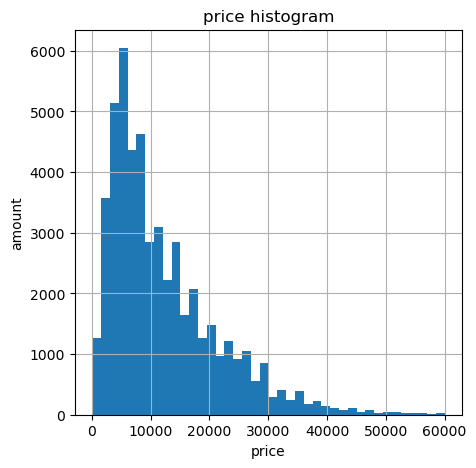

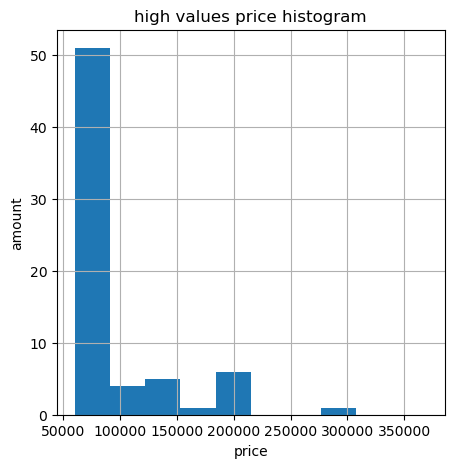

,price,model_year,cylinders,odometer,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate
count,50725.000000,50725.00000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,5.072500e+04,50725.000000
mean,12323.432568,2009.71308,6.522859,114181.032302,39.565027,3.004613,6.627265,2018.307521,8.594441,inf,2.643233
std,10002.627112,6.06587,6.517646,40972.570230,28.208864,1.996937,3.473410,0.461472,6.079272,NaN,0.713139
min,3.000000,1908.00000,3.000000,1800.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,2.608696e+01,1.000000
25%,5299.000000,2007.00000,4.000000,90000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,1.260200e+04,2.000000
50%,9495.000000,2011.00000,6.000000,123025.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,1.589606e+04,3.000000
75%,16905.000000,2014.00000,8.000000,142650.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,1.996800e+04,3.000000
max,375000.000000,2019.00000,100.000000,183533.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,inf,5.000000


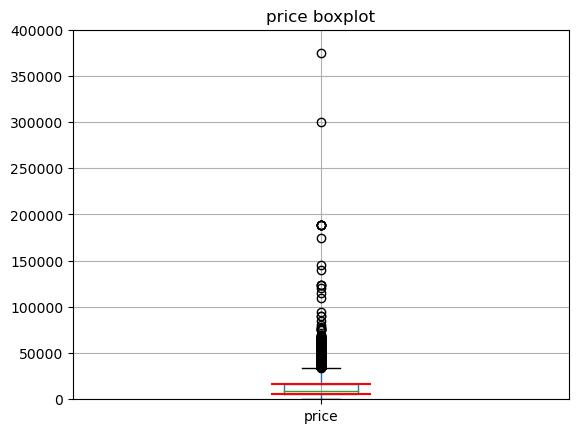

In [60]:
vehicles_us.hist('price', bins=40, range = (100, 60000), figsize = (5,5))
plt.title('price histogram')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()
vehicles_us.hist('price', bins=10,range = (60001, 370000), figsize = (5,5))
plt.title('high values price histogram')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()
P1 = vehicles_us['price'].quantile(0.25)
P3 = vehicles_us['price'].quantile(0.75)
vehicles_us.boxplot('price')
plt.ylim(0, 400000)
plt.hlines(y=[P1,P3], xmin=0.9,xmax=1.1, color='red')
plt.title('price boxplot')
vehicles_us.describe()

We have two histograms because it's easier to look and understand the values, we have a graph for regular prices and the other one for expensive prices.
The histograms show that we have a lot of cars for sale under 30000 and the majority of the cars cost less that 10000. We also can see unreal prices that close to 0, i think those cars the owner didn't want to publish the real price they wanted to receive a request and then to share the real price.

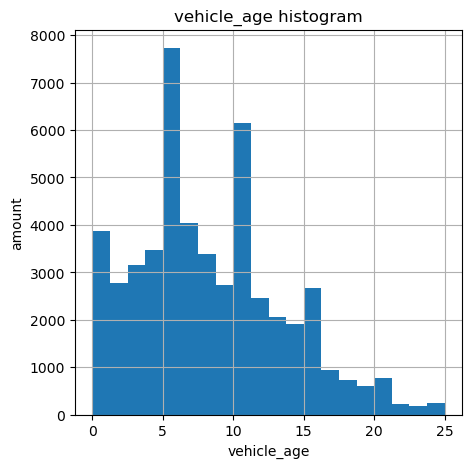

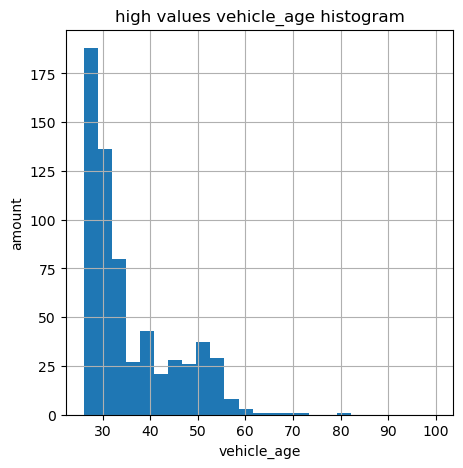

,price,model_year,cylinders,odometer,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate
count,50725.000000,50725.00000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,50725.000000,5.072500e+04,50725.000000
mean,12323.432568,2009.71308,6.522859,114181.032302,39.565027,3.004613,6.627265,2018.307521,8.594441,inf,2.643233
std,10002.627112,6.06587,6.517646,40972.570230,28.208864,1.996937,3.473410,0.461472,6.079272,NaN,0.713139
min,3.000000,1908.00000,3.000000,1800.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,2.608696e+01,1.000000
25%,5299.000000,2007.00000,4.000000,90000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,1.260200e+04,2.000000
50%,9495.000000,2011.00000,6.000000,123025.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,1.589606e+04,3.000000
75%,16905.000000,2014.00000,8.000000,142650.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,1.996800e+04,3.000000
max,375000.000000,2019.00000,100.000000,183533.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,inf,5.000000


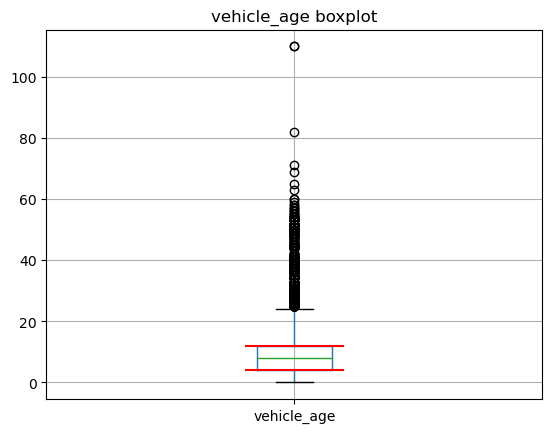

In [61]:
vehicles_us.hist('vehicle_age', bins=20, range = (0, 25), figsize = (5,5))
plt.title('vehicle_age histogram')
plt.xlabel('vehicle_age')
plt.ylabel('amount')
plt.show()
vehicles_us.hist('vehicle_age', bins=25,range = (26, 100), figsize = (5,5))
plt.title('high values vehicle_age histogram')
plt.xlabel('vehicle_age')
plt.ylabel('amount')
plt.show()
A1 = vehicles_us['vehicle_age'].quantile(0.25)
A3 = vehicles_us['vehicle_age'].quantile(0.75)
vehicles_us.boxplot('vehicle_age')
plt.hlines(y=[A1,A3], xmin=0.9,xmax=1.1, color='red')
plt.title('vehicle_age boxplot')
vehicles_us.describe()

The histograms show that we have a lot of cars with age 5 and 10 years and the majority of the cars are less than 20 years, we also can see new cars .and cars with age 80+, 

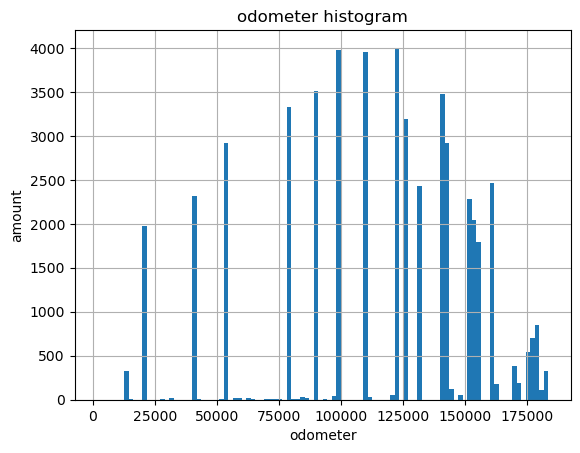

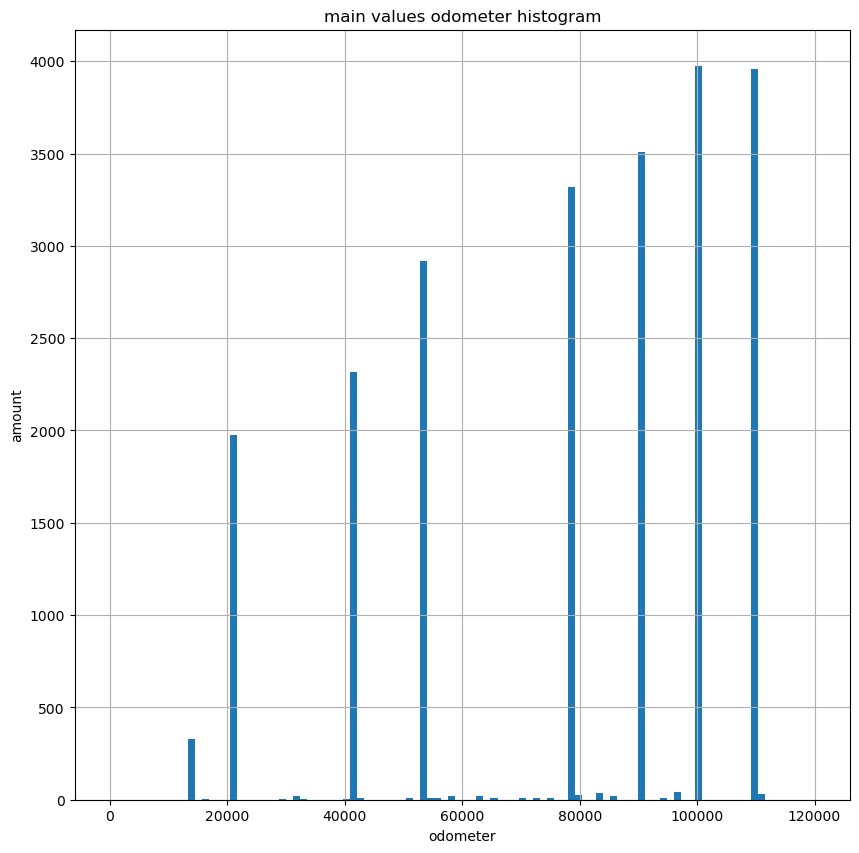

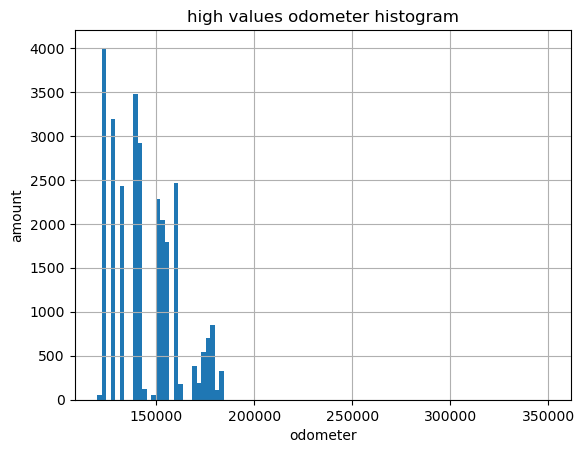

Text(0.5, 1.0, 'odometer boxplot')

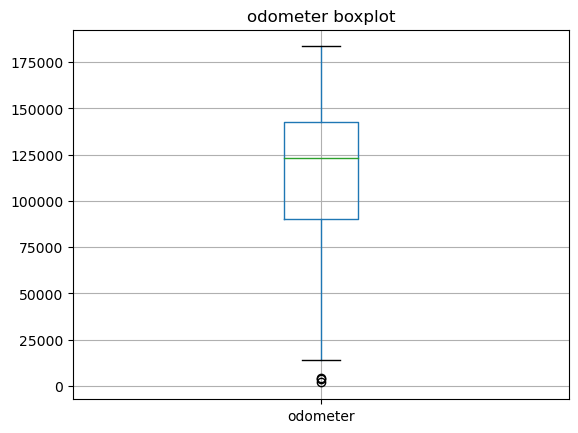

In [62]:
vehicles_us.hist('odometer', bins=100)
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()
vehicles_us.hist('odometer', bins = 100 ,range = (0, 120000), figsize = (10,10))
plt.title('main values odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()
M3 = vehicles_us['odometer'].quantile(0.75)
vehicles_us.hist('odometer', bins = 100, range= (120001,350000))
plt.title('high values odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()
vehicles_us.boxplot('odometer')
plt.title('odometer boxplot')

as we can see in the graphs most of the cars has done 125k miles we can see in the high values histogram amount of cars that has done more than 150000 maybe they are old cars 

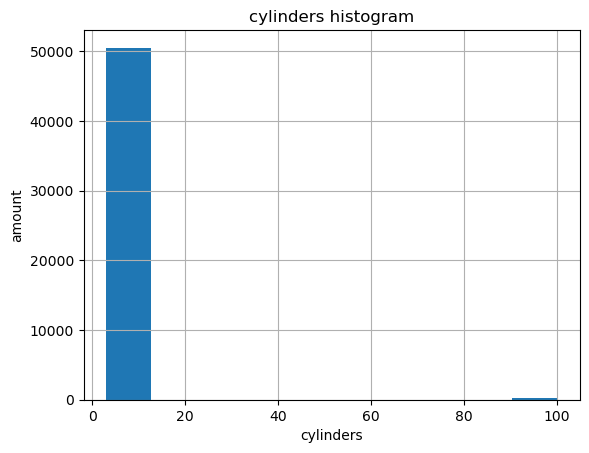

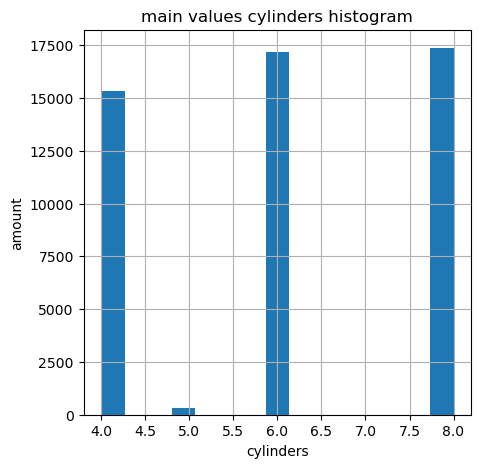

Text(0.5, 1.0, 'odometer boxplot')

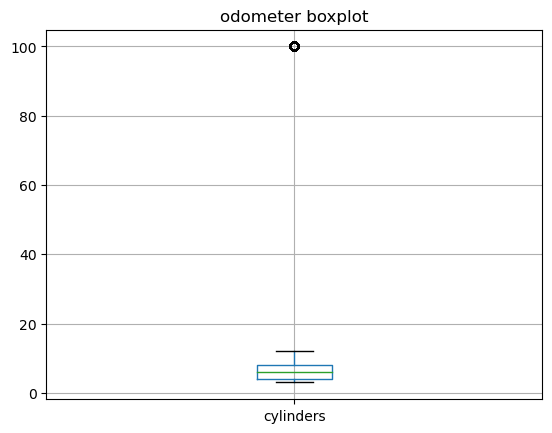

In [63]:
vehicles_us.hist('cylinders')
plt.title('cylinders histogram')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()
C3 = vehicles_us['cylinders'].quantile(0.75)
vehicles_us.hist('cylinders', bins = 15 ,range = (4, 8), figsize = (5,5))
plt.title('main values cylinders histogram')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()
vehicles_us.boxplot('cylinders')
plt.title('odometer boxplot')

from the graphs we can see that the most cars with 8 cylinders, then 6 ,4 and few with 5 and 10 cylinders

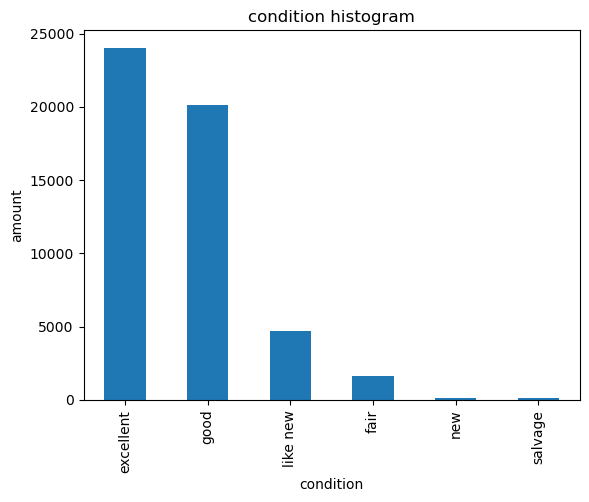

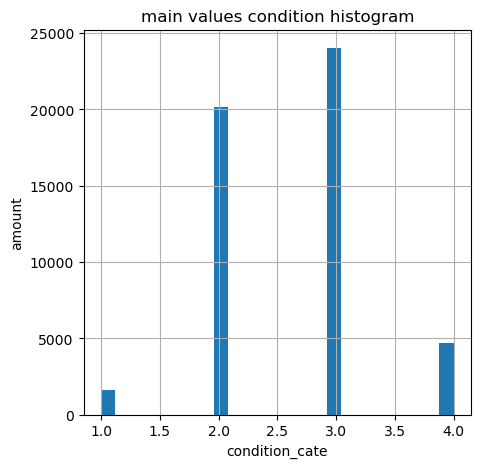

Text(0.5, 1.0, 'condition boxplot')

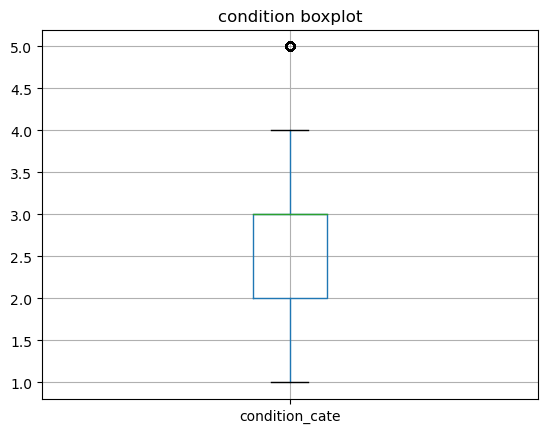

In [64]:
vehicles_us['condition'].value_counts().plot(kind='bar')
plt.title('condition histogram')
plt.xlabel('condition')
plt.ylabel('amount')
plt.show()
D3 = vehicles_us['condition_cate'].quantile(0.75)
vehicles_us.hist('condition_cate', bins = 25 ,range = (1, 4), figsize = (5,5))
plt.title('main values condition histogram')
plt.xlabel('condition_cate')
plt.ylabel('amount')
plt.show()
vehicles_us.boxplot('condition_cate')
plt.title('condition boxplot')

The most of that cars belongs to the category 3 which is  'excellent' and then we have the category 2 'good'
<br>for 'new' and 'like new' we just have few cars that belong to those categories

## Study and treat outliers

we need to determine what columns may contain outliers, and create a DataFrame without those outliers.<br>
Outliers can be identified by defining the lower/upper limits for normal range of values.

Text(0, 0.5, 'amount')

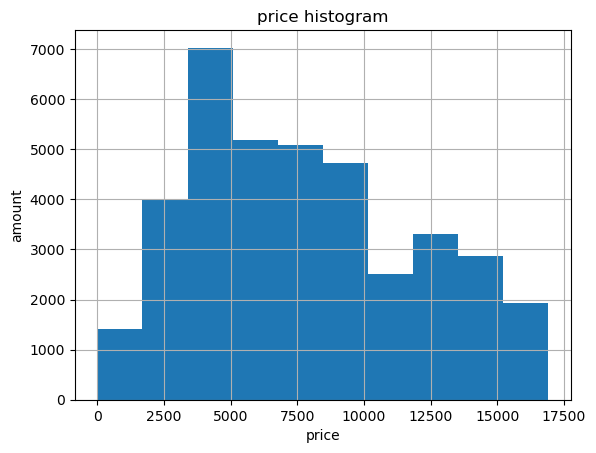

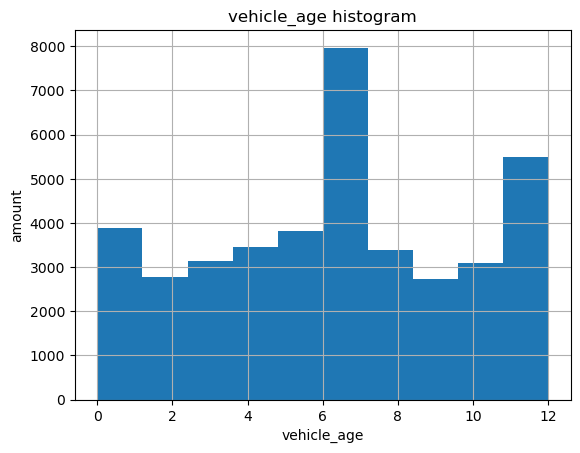

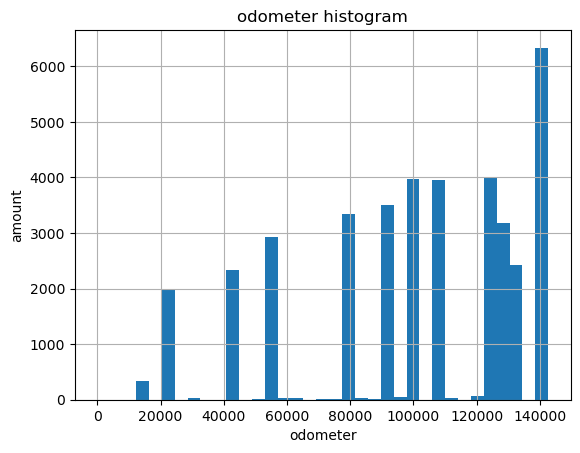

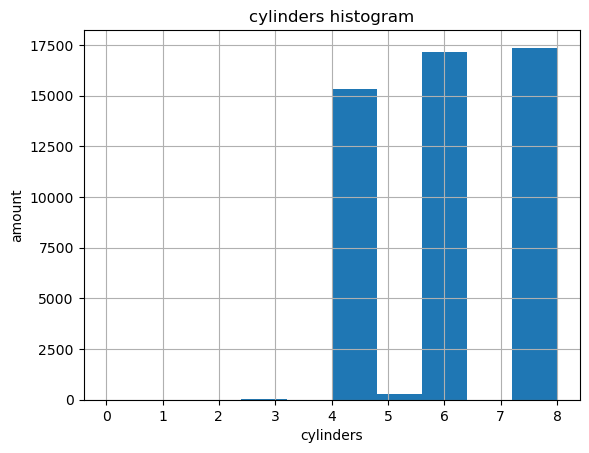

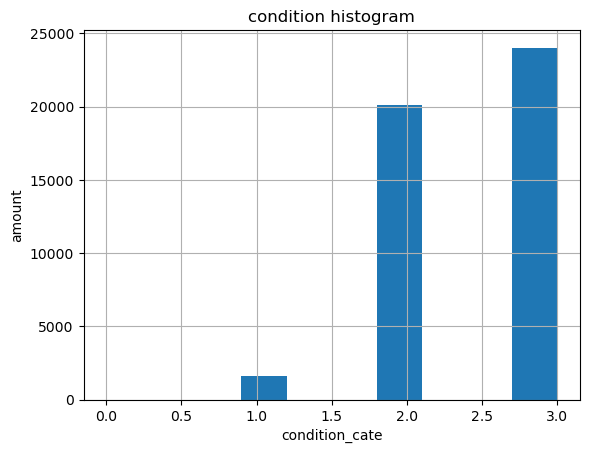

In [65]:
#price - quantile3 (P3) will be the upper limit here, 
vehicles_us.hist('price',range = (0, P3))
plt.title('price histogram')
plt.xlabel('price')
plt.ylabel('amount')

# vehicle_age - quantile3 (A3) will be the upper limit here
vehicles_us.hist('vehicle_age',range = (0, A3))
plt.title('vehicle_age histogram')
plt.xlabel('vehicle_age')
plt.ylabel('amount')

# mileage - quantile3 (M3) will be the upper limit here
vehicles_us.hist('odometer',range = (0, M3), bins = 35)
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')

# number of cylinder - C3 will be the upper limit here:
vehicles_us.hist('cylinders',range = (0, C3))
plt.title('cylinders histogram')
plt.xlabel('cylinders')
plt.ylabel('amount')

# condition - 3 will be the upper limit here because we dont have much values upper than that 
vehicles_us.hist('condition_cate',range = (0, D3))
plt.title('condition histogram')
plt.xlabel('condition_cate')
plt.ylabel('amount')



In [66]:
# Determine the upper limits for outliers
#price
expinsive_cars = vehicles_us.query('price > @P3')
print((expinsive_cars.shape[0] /vehicles_us['price'].shape[0])*100)

#vehicle_age
old_post = vehicles_us.query('vehicle_age > @A3')
print((old_post.shape[0] /vehicles_us['vehicle_age'].shape[0])*100)

#mileage
high_mileage = vehicles_us.query('odometer > @M3')
print((high_mileage.shape[0] /vehicles_us['odometer'].shape[0])*100)

#cylinders
too_many_cylinders = vehicles_us.query('cylinders > @C3')
print((too_many_cylinders.shape[0] /vehicles_us['cylinders'].shape[0])*100)

#condition
good_condition = vehicles_us.query('condition_cate > @D3')
print((good_condition.shape[0] /vehicles_us['condition_cate'].shape[0])*100)

24.999507146377525
21.614588467225236
23.85411532774766
1.0527353376047315
9.797930014785608


the amount of the data in price, vehicle_age, mileage are too big part we have to insert more values 

2.787580088713652
3.1917200591424346
0.0
0.5027106949236076


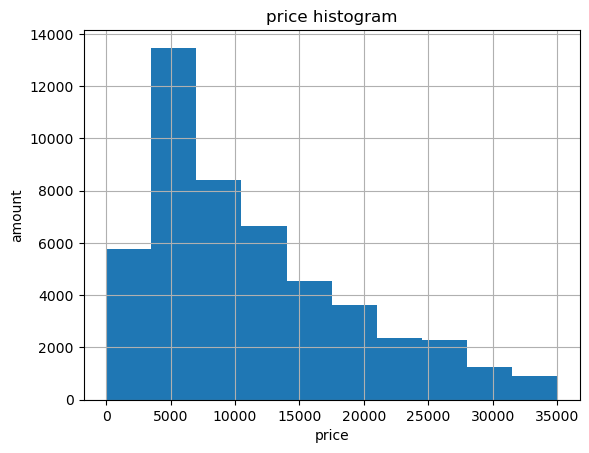

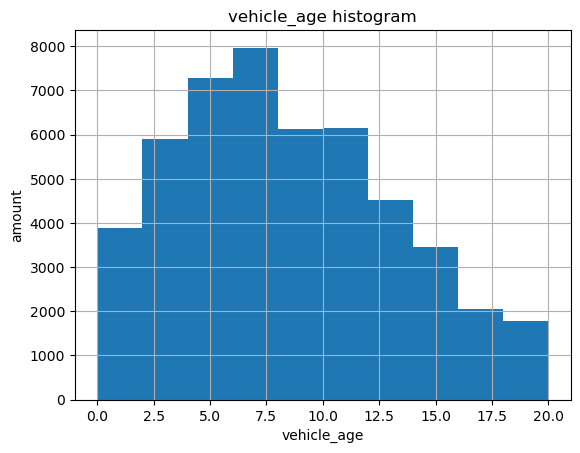

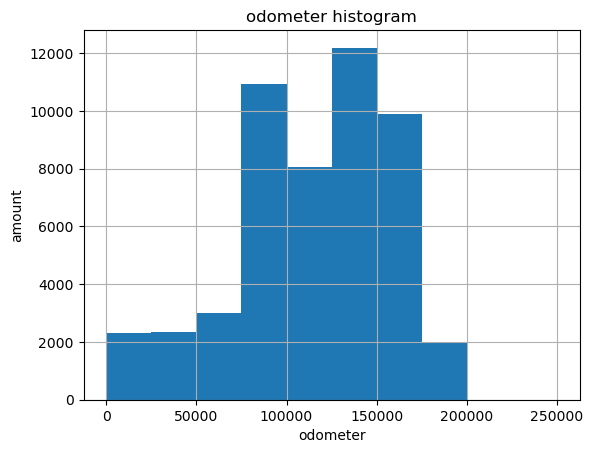

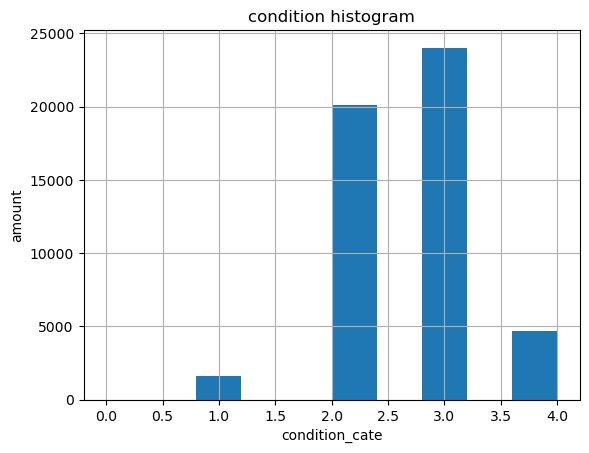

In [67]:
vehicles_us['id'] = vehicles_us.index + 1

#price - 
vehicles_us.hist('price',range = (0, 35000))
plt.title('price histogram')
plt.xlabel('price')
plt.ylabel('amount')
expinsive = vehicles_us.query('price > 35000')
print((expinsive.shape[0] /vehicles_us['price'].shape[0])*100)

# vehicle_age -
vehicles_us.hist('vehicle_age',range = (0, 20))
plt.title('vehicle_age histogram')
plt.xlabel('vehicle_age')
plt.ylabel('amount')
old=vehicles_us.query('vehicle_age > 20')
print((old.shape[0] /vehicles_us['vehicle_age'].shape[0])*100)

# mileage - 
vehicles_us.hist('odometer',range = (0, 250000))
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
high_mile=vehicles_us.query('odometer > 250000')
print((high_mile.shape[0] /vehicles_us['odometer'].shape[0])*100)

#conndition
vehicles_us.hist('condition_cate',range = (0, 4))
plt.title('condition histogram')
plt.xlabel('condition_cate')
plt.ylabel('amount')
high_condition=vehicles_us.query('condition_cate > 4')
print((high_condition.shape[0] /vehicles_us['condition_cate'].shape[0])*100)


In [68]:
outliers = vehicles_us.query('price > 35000 | vehicle_age > 20 | odometer > 250000 | cylinders > 8 ')
print((outliers.shape[0] /vehicles_us.shape[0])*100)

outliers
bad_ids = outliers['id']
good_data = vehicles_us.query('id not in @bad_ids')
good_data

6.8171513060621


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
0,9400,2011,bmw x5,good,6,gas,123025.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,17575.000000,2,1
1,25500,2011,ford f-150,good,6,gas,123025.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,17575.000000,2,2
2,5500,2013,hyundai sonata,like new,4,gas,99840.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,16640.000000,4,3
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,10087.312500,1,4
4,14900,2017,chrysler 200,excellent,4,gas,41000.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,20500.000000,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,99840.0,automatic,sedan,black,False,2018-10-03,37,2,10,2018,5,19968.000000,4,51521
51521,2700,2002,honda civic,salvage,4,gas,160000.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,16,10000.000000,5,51522
51522,3950,2009,hyundai sonata,excellent,4,gas,131507.0,automatic,sedan,blue,False,2018-11-15,32,3,11,2018,9,14611.888889,3,51523
51523,7455,2013,toyota corolla,good,4,gas,99840.0,automatic,sedan,black,False,2018-07-02,71,0,7,2018,5,19968.000000,2,51524


the data now make more sense and all of our outliers values together are 6.4
i gave each add in the website an id , now we can see a list of idsfor outliers and good data 

In [69]:
print(good_data.condition.unique())

print(len(good_data))

good_data[['price', 'vehicle_age', 'odometer', 'cylinders']].describe().loc[['min', 'max']]

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
47267


,price,vehicle_age,odometer,cylinders
min,3.0,0.0,14151.5,3.0
max,35000.0,20.0,179183.0,8.0


## Study core parameters without outliers

Text(0, 0.5, 'amount')

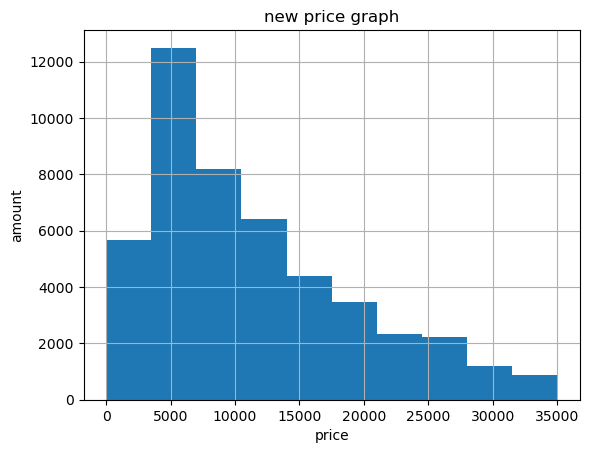

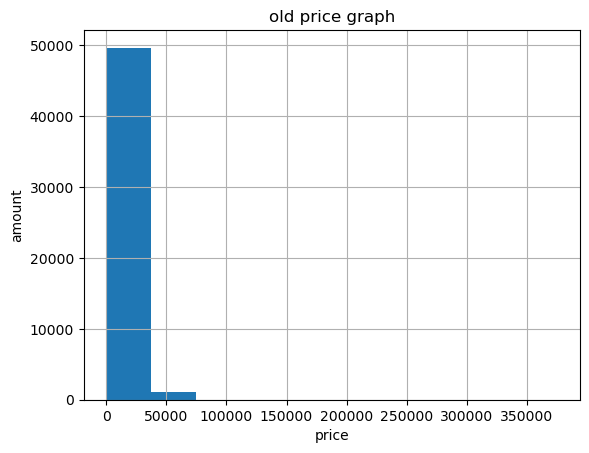

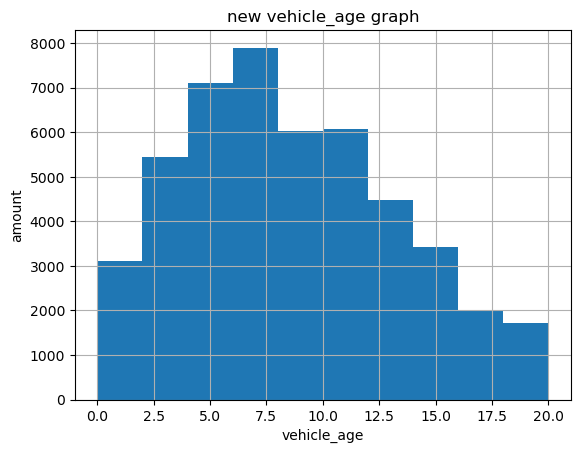

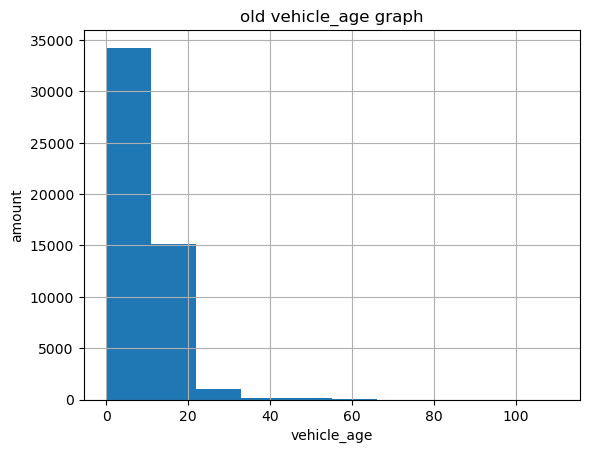

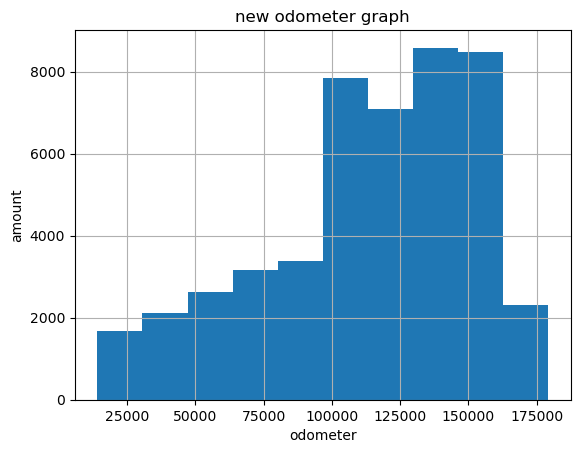

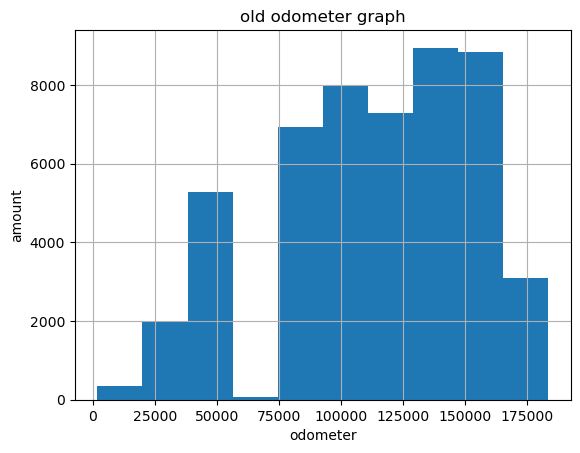

In [70]:
good_data.hist('price')
plt.title('new price graph')
plt.xlabel('price')
plt.ylabel('amount')

vehicles_us.hist('price')
plt.title('old price graph')
plt.xlabel('price')
plt.ylabel('amount')

good_data.hist('vehicle_age')
plt.title('new vehicle_age graph')
plt.xlabel('vehicle_age')
plt.ylabel('amount')

vehicles_us.hist('vehicle_age')
plt.title('old vehicle_age graph')
plt.xlabel('vehicle_age')
plt.ylabel('amount')

good_data.hist('odometer')
plt.title('new odometer graph')
plt.xlabel('odometer')
plt.ylabel('amount')

vehicles_us.hist('odometer')
plt.title('old odometer graph')
plt.xlabel('odometer')
plt.ylabel('amount')

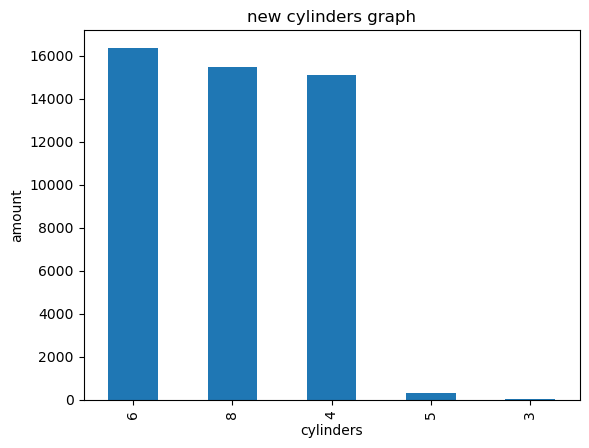

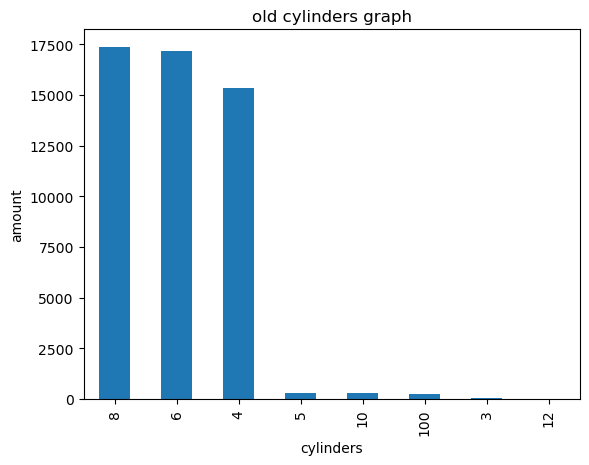

In [71]:
good_data['cylinders'].value_counts().plot(kind='bar')
plt.title('new cylinders graph')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

vehicles_us['cylinders'].value_counts().plot(kind='bar')
plt.title('old cylinders graph')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

from the histogram for the good data and the original data, we can see that the data that we have now is more focused; we can now rely on the data and make decisions based on the data . Our new graphs looks more normal and we can see where is the major of our data<br>
<br>
price:<br>
in the old graph we can see long tail from 0 to 75000, we didnt understand the distribution of the data 
after cleaning the data from outliers we can see the graph values between 0 to 350000, also we dont see alot of peeks in the graphs, we have on 5000 jump. we can see that we dont have expensive cars in our data but we can see the highest price 350000
<br>
<br>
vehicle_age:<br>
also in old graph we can see a tail from 0 to 50, we can see to peeks from 0 to 20,
the new histogram is more readabel, the range between 0 to 20. the distribution is more clear we can see that the majorty of the cars with age from 5 to 12.5 years 
<br>
<br>
odometer:<br>
the old graph has gaps, suddenly we dont have much values in the range, but the new graph shows us the distribution
of the data, between the range 0 to 175000. we can see that the majorty of cars have done between 100k to 160k miles, they must be cheaper.
<br>
<br>
cylinders:<br>
we used bar graph because we dont have much values, the old graph run between 0 to 12, there is alot of values with 6,8 4 and then a few values in 5 and 10.
in the new graph we have only values between 3 to 8 , we can see now the main values in the column 4,6 and 8 .


## Ads lifetime

let's Study how many days advertisements were displayed (`days_listed`).
we need to Calculate the mean and median. and describe the typical lifetime of an ad, determine when ads were removed quickly, and when they were listed for an abnormally long time.

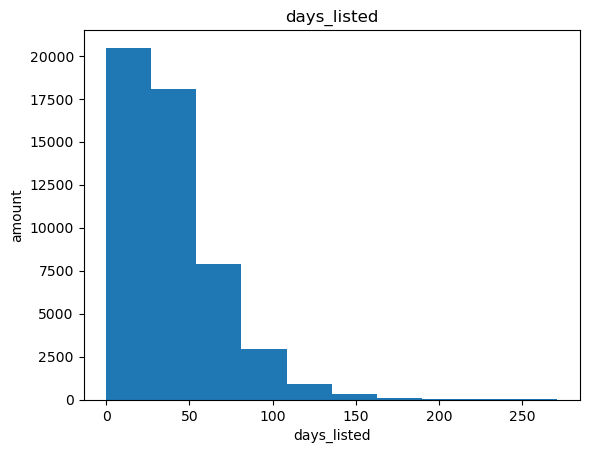

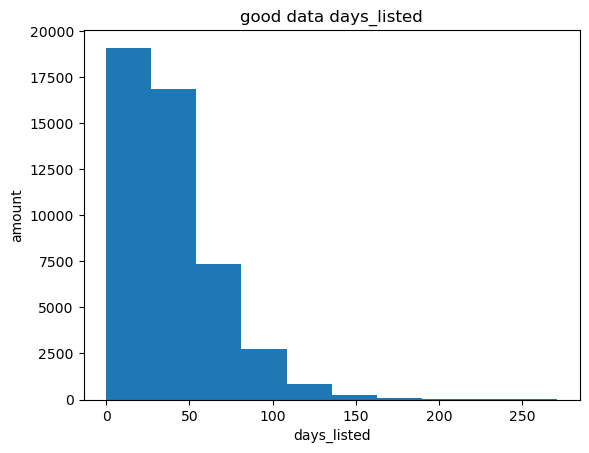

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
price,1.000000,0.560220,0.346014,-0.583208,0.360680,-0.003844,-0.001537,-0.008397,0.007527,-0.557916,0.497150,0.190481,-0.016725
model_year,0.560220,1.000000,-0.177165,-0.948386,-0.031311,-0.004003,-0.000909,-0.020132,0.019752,-0.995274,0.819480,0.255431,-0.022161
cylinders,0.346014,-0.177165,1.000000,0.167880,0.413694,0.003458,-0.006725,0.000528,-0.000635,0.176606,-0.139341,-0.094484,0.004425
odometer,-0.583208,-0.948386,0.167880,1.000000,0.028711,0.006953,0.000879,0.016538,-0.016814,0.944090,-0.869058,-0.241289,0.024063
is_4wd,0.360680,-0.031311,0.413694,0.028711,1.000000,0.002183,0.003083,0.003369,-0.001987,0.031031,-0.026538,-0.011192,0.005098
days_listed,-0.003844,-0.004003,0.003458,0.006953,0.002183,1.000000,0.001984,-0.008719,0.010433,0.005005,-0.006747,-0.000802,0.007745
weekday,-0.001537,-0.000909,-0.006725,0.000879,0.003083,0.001984,1.000000,0.005363,-0.005821,0.000341,-0.004167,0.003671,-0.003847
month,-0.008397,-0.020132,0.000528,0.016538,0.003369,-0.008719,0.005363,1.000000,-0.817467,-0.059325,0.191278,-0.006171,-0.005904
year_ad,0.007527,0.019752,-0.000635,-0.016814,-0.001987,0.010433,-0.005821,-0.817467,1.000000,0.077433,-0.234293,0.005420,0.001992
vehicle_age,-0.557916,-0.995274,0.176606,0.944090,0.031031,0.005005,0.000341,-0.059325,0.077433,1.000000,-0.841703,-0.254188,0.022292


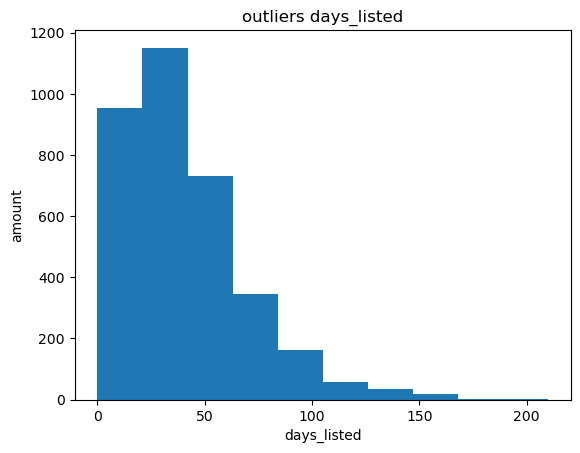

In [72]:
vehicles_us['days_listed'].plot(kind='hist', title='days_listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
plt.show()

good_data['days_listed'].plot(kind='hist', title='good data days_listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
plt.show()

outliers['days_listed'].plot(kind='hist', title='outliers days_listed')
plt.xlabel('days_listed')
plt.ylabel('amount')

good_data.corr()


In [73]:
long_time_listed = good_data.query('days_listed > 150')
long_time_listed

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
51,3800,2012,ford focus,good,4,gas,110000.0,automatic,sedan,black,False,2018-11-29,261,3,11,2018,6,18333.333333,2,52
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,78285.5,other,coupe,grey,False,2019-01-16,152,2,1,2019,4,19571.375000,2,90
688,26995,2016,chevrolet silverado,like new,8,gas,53998.5,automatic,pickup,white,True,2018-09-01,152,5,9,2018,2,26999.250000,4,689
850,8595,2014,dodge charger,like new,8,gas,90000.0,automatic,sedan,blue,False,2018-10-14,154,6,10,2018,4,22500.000000,4,851
878,13250,2008,toyota 4runner,excellent,6,gas,139973.0,automatic,SUV,black,True,2018-06-19,151,1,6,2018,10,13997.300000,3,879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50921,9995,2012,toyota tacoma,excellent,6,gas,110000.0,automatic,truck,grey,False,2018-09-19,162,2,9,2018,6,18333.333333,3,50922
51052,8495,2013,hyundai elantra,good,4,gas,99840.0,automatic,sedan,blue,False,2018-06-30,158,5,6,2018,5,19968.000000,2,51053
51321,3500,2005,toyota camry,excellent,4,gas,153069.5,automatic,sedan,green,False,2018-06-07,159,3,6,2018,13,11774.576923,3,51322
51489,1200,2005,volkswagen jetta,fair,5,gas,153069.5,automatic,sedan,grey,False,2018-10-10,158,2,10,2018,13,11774.576923,1,51490


In [74]:
short_time_listed = good_data.query('days_listed < 30')
short_time_listed

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
0,9400,2011,bmw x5,good,6,gas,123025.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,17575.000000,2,1
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,16,10087.312500,1,4
4,14900,2017,chrysler 200,excellent,4,gas,41000.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,20500.000000,3,5
5,14990,2014,chrysler 300,excellent,6,gas,90000.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,22500.000000,3,6
8,11500,2012,kia sorento,excellent,4,gas,110000.0,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,18333.333333,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51506,28900,2017,ford f150 supercrew cab xlt,good,6,gas,41000.0,automatic,pickup,unknown,True,2019-04-11,25,3,4,2019,2,20500.000000,2,51507
51509,5980,2010,subaru impreza,excellent,4,gas,127168.5,manual,hatchback,white,True,2019-01-10,8,3,1,2019,9,14129.833333,3,51510
51513,17999,2014,ram 1500,like new,8,gas,90000.0,automatic,pickup,white,True,2018-06-21,11,3,6,2018,4,22500.000000,4,51514
51521,2700,2002,honda civic,salvage,4,gas,160000.0,automatic,sedan,white,False,2018-11-14,22,2,11,2018,16,10000.000000,5,51522


In [75]:
print(vehicles_us['days_listed'].mean())
print(good_data['days_listed'].mean())
print(outliers['days_listed'].mean())

print(vehicles_us['days_listed'].median())
print(good_data['days_listed'].median())
print(outliers['days_listed'].median())

39.56502710694924
39.53134322042863
40.02544823597455
33.0
33.0
34.0


Text(0, 0.5, 'days_listed')

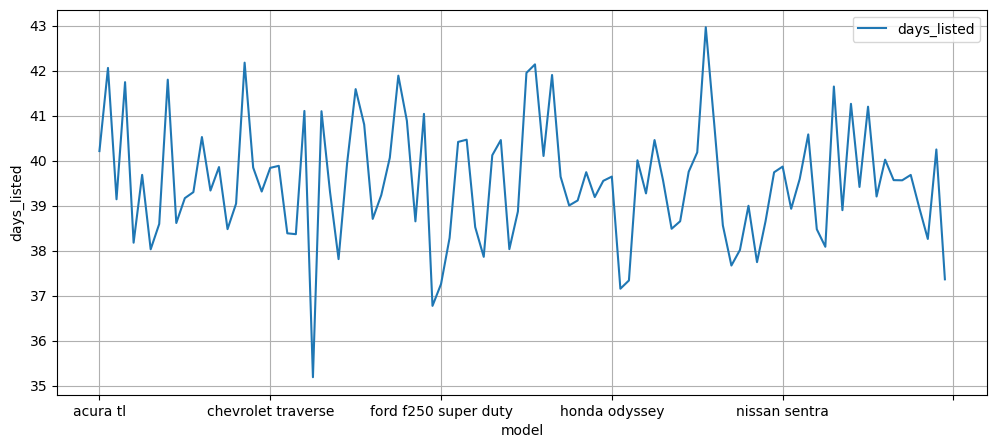

In [76]:
(good_data
      .pivot_table(index='model',values='days_listed')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('model')
plt.ylabel('days_listed')

we have 3 histograms for every kind of data and day listed, the is no obvious different between the two graphs of the original data and the good data, put we can see that the amount of entities for each values is less when we filter the data.
most of the ads listed less than 50 days in the tails of the graph we can see cars that listed more than 150 days.<br>
<br>
i wanted to check if there any correlation between daylisted and the other parameter, but we can see that there is no connection between the parameters but with the vehicle age has a small correlation, ads for new cars can be removed faster that old cars <br>
<br>
also we can see from the table for cars that listed more than 150 days, there are too many cars that are old ones and they made a lot of odometer, on the other hand we can see the table for cars that listed less than 30 days, they ads in the table is more attractive, the prices suites the car condition and the odometer that the cars had made  

## Average price per each type of vehicle

In [77]:
vehicles_us[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']].describe().loc[['min', 'max']]

,price,vehicle_age,odometer,cylinders
min,3.0,0.0,1800.0,3.0
max,375000.0,110.0,183533.0,100.0


In [78]:
ave_price=good_data.groupby(['type','is_4wd'])['price'].mean()
ave_price

type         is_4wd
SUV          False      9411.542882
             True      11346.467010
bus          False     11306.875000
convertible  False     13424.865455
             True      16728.416667
coupe        False     14340.079533
             True       8766.666667
hatchback    False      6826.076291
             True       7102.424837
mini-van     False      8045.236627
             True       8448.868421
offroad      False      8825.000000
             True      15344.341463
other        False      8880.594595
             True      12609.168142
pickup       False     10384.520385
             True      17317.254343
sedan        False      6966.490058
             True       9380.869565
truck        False     11284.588257
             True      17202.699143
van          False     10644.471204
             True      10467.304348
wagon        False      6779.640086
             True       9910.604364
Name: price, dtype: float64

In [79]:
ave_price.sort_values()

type         is_4wd
wagon        False      6779.640086
hatchback    False      6826.076291
sedan        False      6966.490058
hatchback    True       7102.424837
mini-van     False      8045.236627
             True       8448.868421
coupe        True       8766.666667
offroad      False      8825.000000
other        False      8880.594595
sedan        True       9380.869565
SUV          False      9411.542882
wagon        True       9910.604364
pickup       False     10384.520385
van          True      10467.304348
             False     10644.471204
truck        False     11284.588257
bus          False     11306.875000
SUV          True      11346.467010
other        True      12609.168142
convertible  False     13424.865455
coupe        False     14340.079533
offroad      True      15344.341463
convertible  True      16728.416667
truck        True      17202.699143
pickup       True      17317.254343
Name: price, dtype: float64

here we can see which types are expensive, we can see that the 4 most expensive type cars with 4x4

In [80]:
count_car_type = good_data.pivot_table(index = 'type', values = 'id', aggfunc='count')
print(count_car_type)

                id
type              
SUV          11582
bus              8
convertible    311
coupe         1892
hatchback     1005
mini-van      1141
offroad        170
other          224
pickup        6256
sedan        11826
truck        10738
van            596
wagon         1518


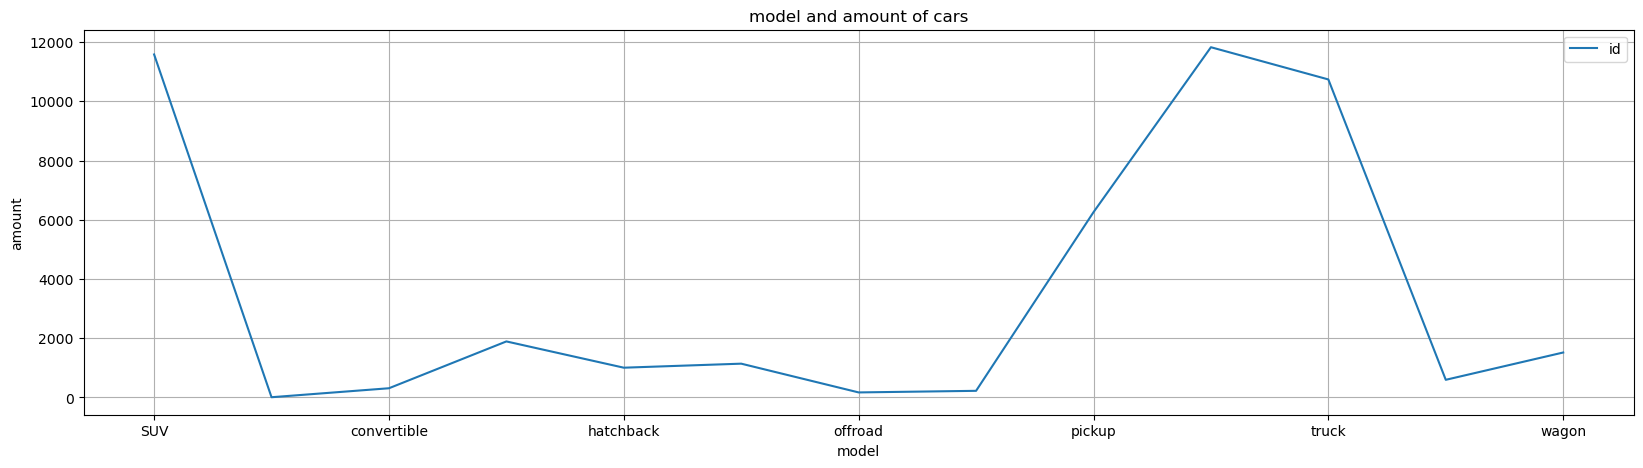

In [81]:
import matplotlib.pyplot as plt

count_car_type.plot(grid=True, figsize=(20,5))
plt.title("model and amount of cars")
plt.xlabel("model")
plt.ylabel("amount")

select_types = good_data.query('type == "SUV" | type == "sedan"')

## Price factors

What factors impact the price most? i will take each of the popular types i detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), i will plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, we need to note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [82]:
suvs=good_data[good_data['type'] == 'SUV']
suvs.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
price,1.000000,0.644693,0.032721,-0.665565,0.124052,-0.019723,0.004665,-0.006978,0.001896,-0.642133,0.584294,0.272430,-0.007830
model_year,0.644693,1.000000,-0.330072,-0.946931,-0.070631,-0.014742,-0.002187,-0.016805,0.012603,-0.995072,0.822299,0.287769,-0.015216
cylinders,0.032721,-0.330072,1.000000,0.333800,0.119171,0.016224,-0.009114,0.003741,-0.007376,0.328127,-0.276902,-0.105064,0.005205
odometer,-0.665565,-0.946931,0.333800,1.000000,0.065252,0.021105,0.003802,0.015544,-0.013149,0.942144,-0.872977,-0.276513,0.020838
is_4wd,0.124052,-0.070631,0.119171,0.065252,1.000000,-0.006220,0.013121,-0.001923,-0.005652,0.069811,-0.046189,-0.006362,0.012565
days_listed,-0.019723,-0.014742,0.016224,0.021105,-0.006220,1.000000,-0.009333,-0.002636,-0.002265,0.014463,-0.011294,-0.013704,0.000710
weekday,0.004665,-0.002187,-0.009114,0.003802,0.013121,-0.009333,1.000000,0.019688,-0.016134,0.000579,-0.005909,0.009767,-0.020167
month,-0.006978,-0.016805,0.003741,0.015544,-0.001923,-0.002636,0.019688,1.000000,-0.816925,-0.064267,0.185850,-0.002648,-0.011996
year_ad,0.001896,0.012603,-0.007376,-0.013149,-0.005652,-0.002265,-0.016134,-0.816925,1.000000,0.086608,-0.228388,0.001443,0.000460
vehicle_age,-0.642133,-0.995072,0.328127,0.942144,0.069811,0.014463,0.000579,-0.064267,0.086608,1.000000,-0.843541,-0.286568,0.015206


In [83]:
for_scatter_suvs = suvs[['price', 'vehicle_age', 'odometer', 'condition_cate']]
for_scatter_suvs

,price,vehicle_age,odometer,condition_cate
0,9400,7,123025.0,2
7,15990,6,99840.0,3
8,11500,6,110000.0,3
14,12990,10,131507.0,3
17,13990,4,90000.0,3
...,...,...,...,...
51495,9500,7,110000.0,2
51496,4999,16,160000.0,3
51500,6995,6,110000.0,3
51502,7995,8,123025.0,4


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='conditi

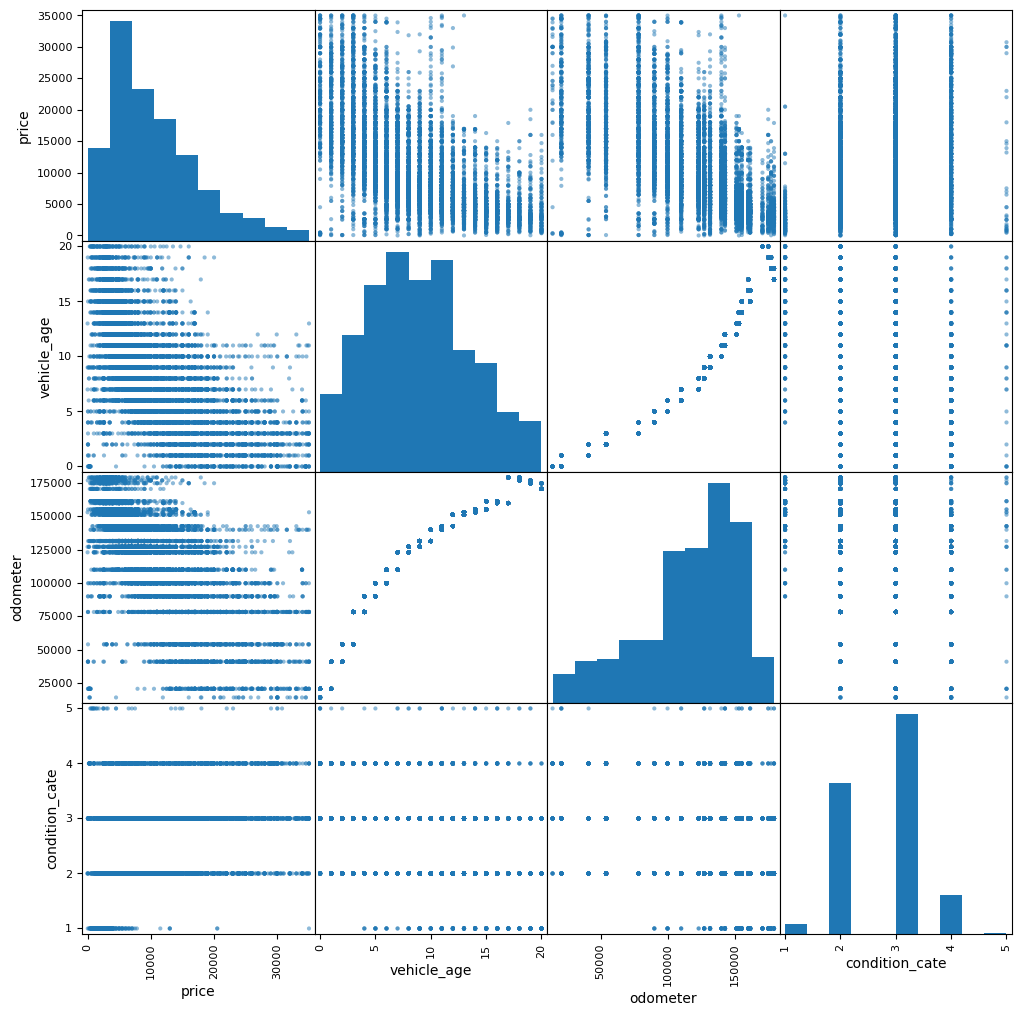

In [84]:
pd.plotting.scatter_matrix(for_scatter_suvs,figsize = (12,12))

Consider the 2nd row in the 1st column, vehicle's age. We can see a trend there: the older the car, the less it costs. You can notice the there are no values in the right upper corner, since 20 years-old cars usually cost not to much, that is why points are located in the left side. 

Let's make this graph clear. Since we have a lot of cars for each age value: some cars are 1 year old, some are 2 and so on, we can group by the age value and represent the median price: 

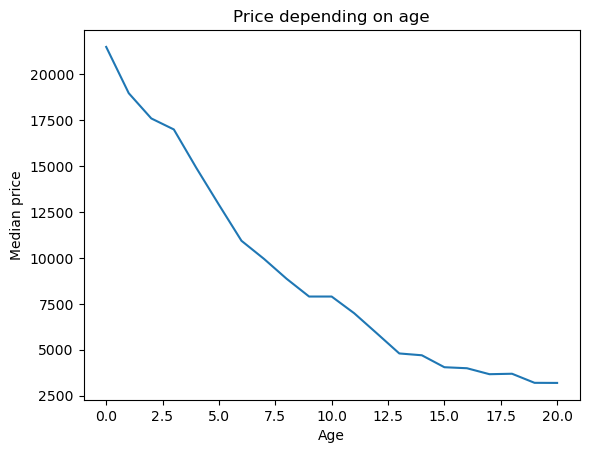

In [85]:


suvs.groupby('vehicle_age')['price'].median().plot(title='Price depending on age', xlabel='Age', ylabel='Median price')

plt.show()

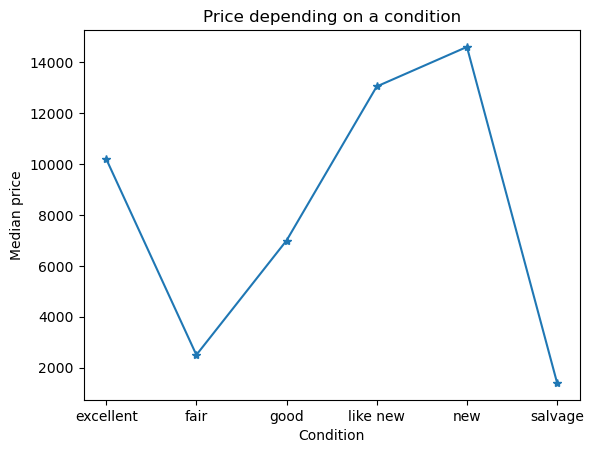

In [86]:
suvs.groupby('condition')['price'].median().plot(title='Price depending on a condition', xlabel='Condition',
                                                      ylabel='Median price', marker='*')
plt.show()

in the correlation table we can see the high negative correlation between vehicle_age and the price -0.642133 , that mean the older the vehicle, the lower the price <br>
<br>
also for odometer -0.665514 high negative correlation means that cars with high mileage they cost less than cars with few mileage.<br>
<br>
there is a high positive correlation between model_year and price which mean if the car is brand new it will cost more than old car 
in the other variables we don't see a noticed connection

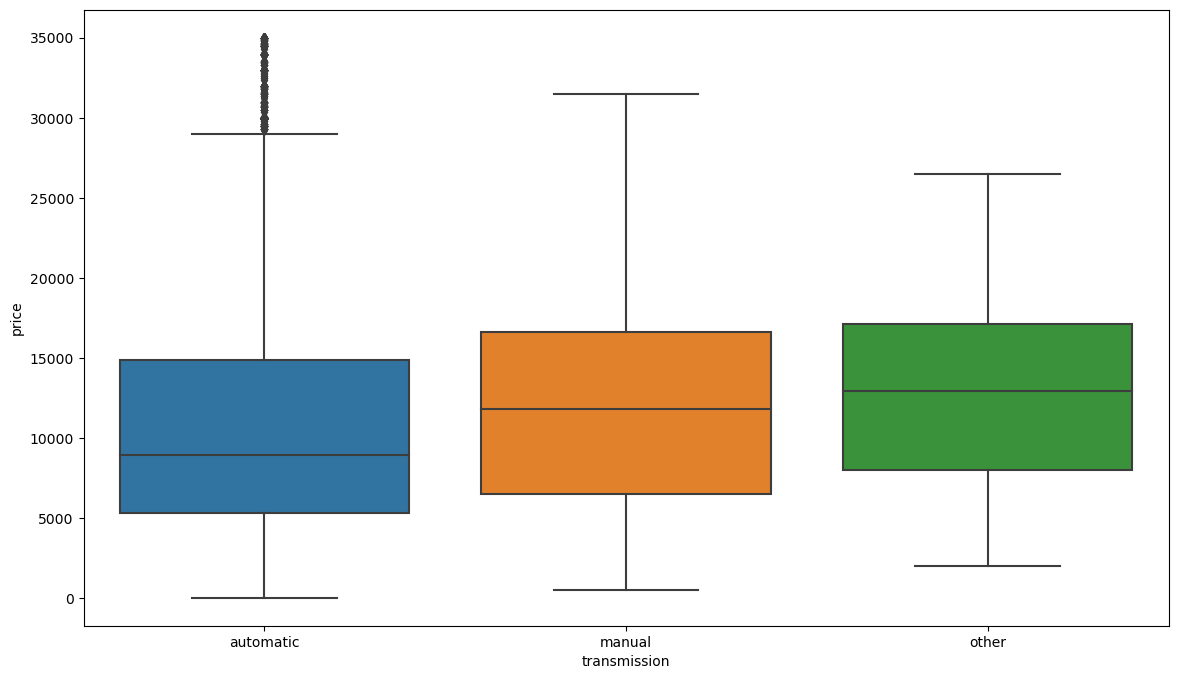

In [87]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='transmission', y='price',data=suvs)

**here we can see that the prices for each transmission type are the same more or less (they are at the same level), so there is no correlation between transmission and the price,  the conclusion is the price less influenced by the transmission of the car.**

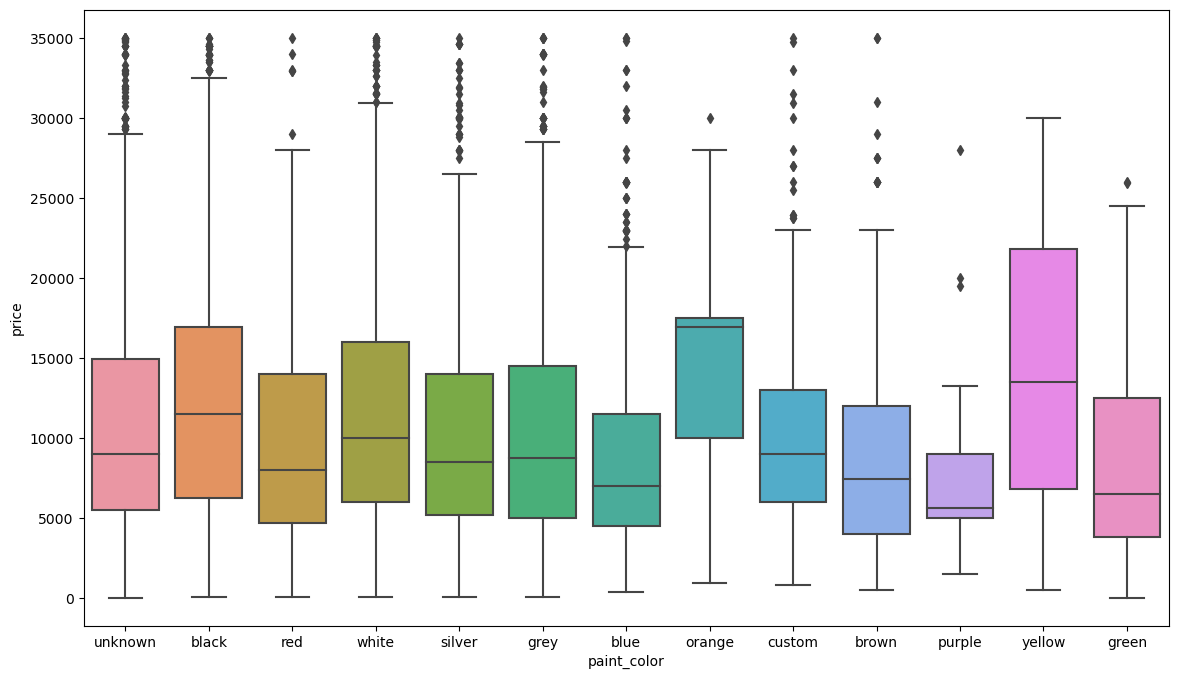

In [88]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='paint_color', y='price',data=suvs)

the colors at the same level more or less - there is no correlation between color and the price <br>
the price is less influenced by the color of the car accept two colors orange and yellow, Because of their color, the price of the car is maintained.<br>
i think because the vehicles with orange colors are less involved in accidents than any other color. also wild options like yellow and orange help cars hold onto their value better, Or these orange cars are rare and expensive. Sport cars or smth like this.

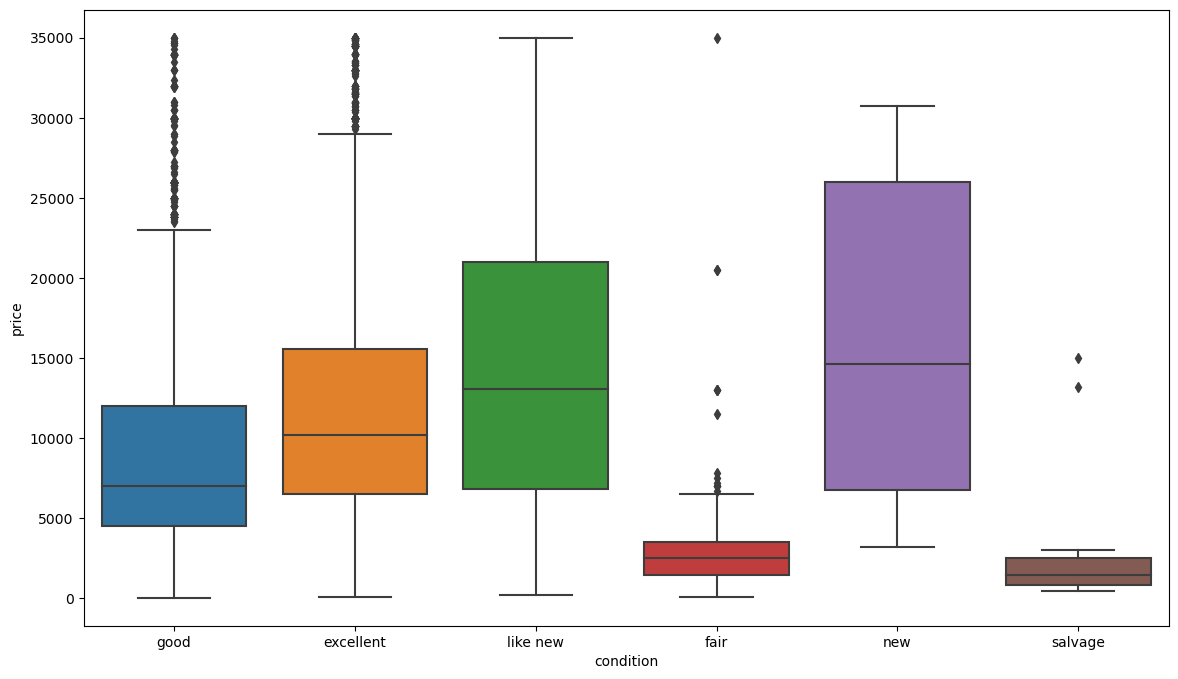

In [89]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='condition', y='price',data=suvs)

the condition of the car absolutely affect the price, we can see 'fair' and 'salvage' are in the lower level of price, but 'new','like new' and 'excellent' with higher average of price, the better the condition is, the higher the price 

In [90]:
sedans=good_data[good_data['type'] == 'sedan']
sedans.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday,month,year_ad,vehicle_age,average_mileage,condition_cate,id
price,1.000000,0.662710,0.000821,-0.701054,0.110946,0.002814,-0.007051,-0.017704,0.016658,-0.658878,0.599086,0.290632,0.016648
model_year,0.662710,1.000000,-0.190081,-0.950299,0.023670,-0.003986,-0.001233,-0.025759,0.023315,-0.994410,0.802577,0.291663,-0.003694
cylinders,0.000821,-0.190081,1.000000,0.194141,0.123638,0.000797,-0.009520,-0.004280,-0.001828,0.189293,-0.165173,-0.075888,0.015691
odometer,-0.701054,-0.950299,0.194141,1.000000,-0.015290,0.004006,0.002301,0.021748,-0.020940,0.945116,-0.855083,-0.301770,0.000809
is_4wd,0.110946,0.023670,0.123638,-0.015290,1.000000,0.002973,-0.018364,0.008438,-0.005841,-0.024213,0.022185,0.006207,-0.013047
days_listed,0.002814,-0.003986,0.000797,0.004006,0.002973,1.000000,0.011685,-0.007434,0.012978,0.005344,-0.011276,-0.004288,0.025170
weekday,-0.007051,-0.001233,-0.009520,0.002301,-0.018364,0.011685,1.000000,0.001813,-0.003744,0.000834,-0.002097,-0.005828,0.005034
month,-0.017704,-0.025759,-0.004280,0.021748,0.008438,-0.007434,0.001813,1.000000,-0.817920,-0.060703,0.208836,-0.005760,0.005977
year_ad,0.016658,0.023315,-0.001828,-0.020940,-0.005841,0.012978,-0.003744,-0.817920,1.000000,0.082370,-0.255157,0.007099,-0.006154
vehicle_age,-0.658878,-0.994410,0.189293,0.945116,-0.024213,0.005344,0.000834,-0.060703,0.082370,1.000000,-0.828980,-0.290002,0.003033


In [91]:
for_scatter_sedans = sedans[['price', 'vehicle_age', 'odometer', 'condition_cate']]
for_scatter_sedans

,price,vehicle_age,odometer,condition_cate
2,5500,6,99840.0,4
4,14900,2,41000.0,3
5,14990,4,90000.0,3
6,12990,3,78285.5,3
11,8990,7,110000.0,3
...,...,...,...,...
51520,9249,5,99840.0,4
51521,2700,16,160000.0,5
51522,3950,9,131507.0,3
51523,7455,5,99840.0,2


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='vehicle_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_cate'>,
        <AxesSubplot:xlabel='condition_cate', ylabel='conditi

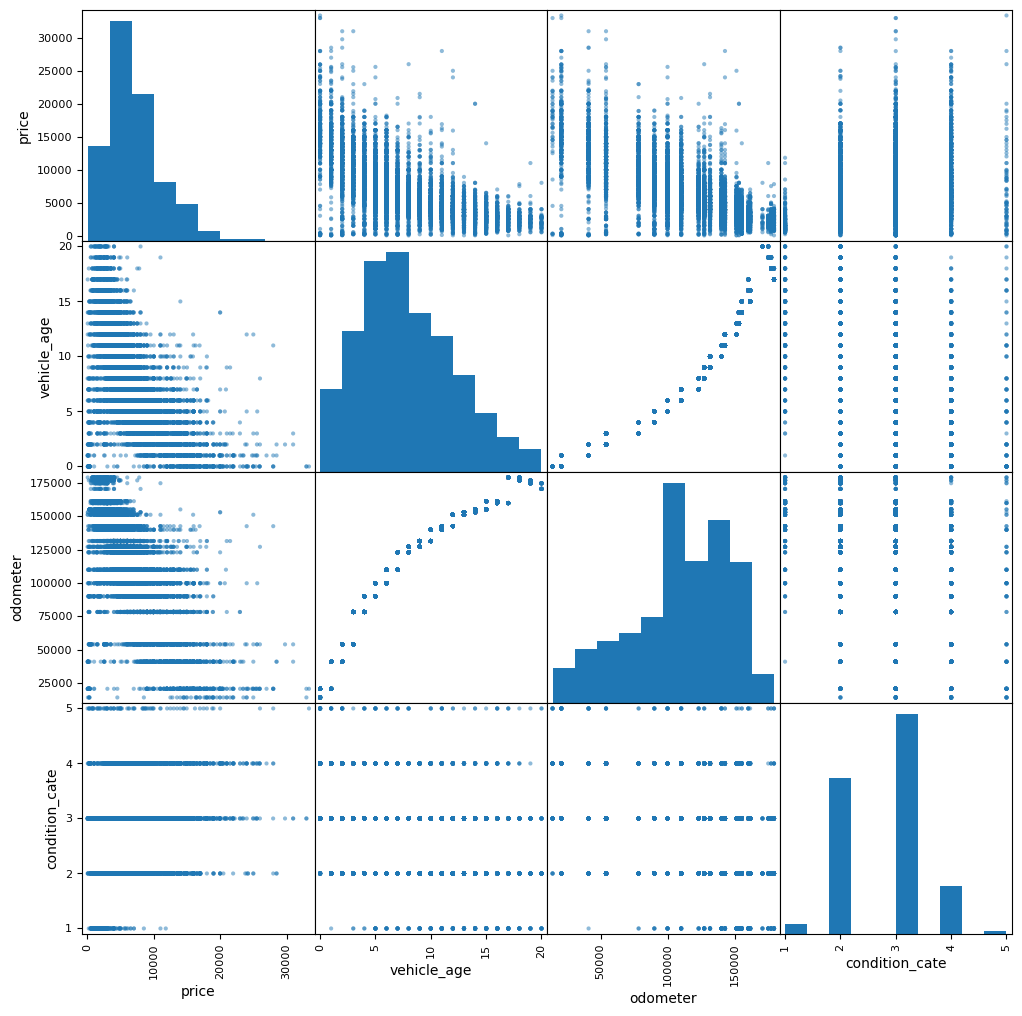

In [92]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(for_scatter_sedans,figsize = (12,12))

in the correlation table we can see the high negative correlation between vehicle_age and the price -0.693192, that mean the older the vehicle, the lower the price <br>
<br>
also for odometer -0.704583 high negative correlation means that cars with high mileage they cost less than cars with few mileage.<br>
<br>
there is a high positive correlation between model_year and price 0.696241 which mean if the car is brand new it will cost more than old car 

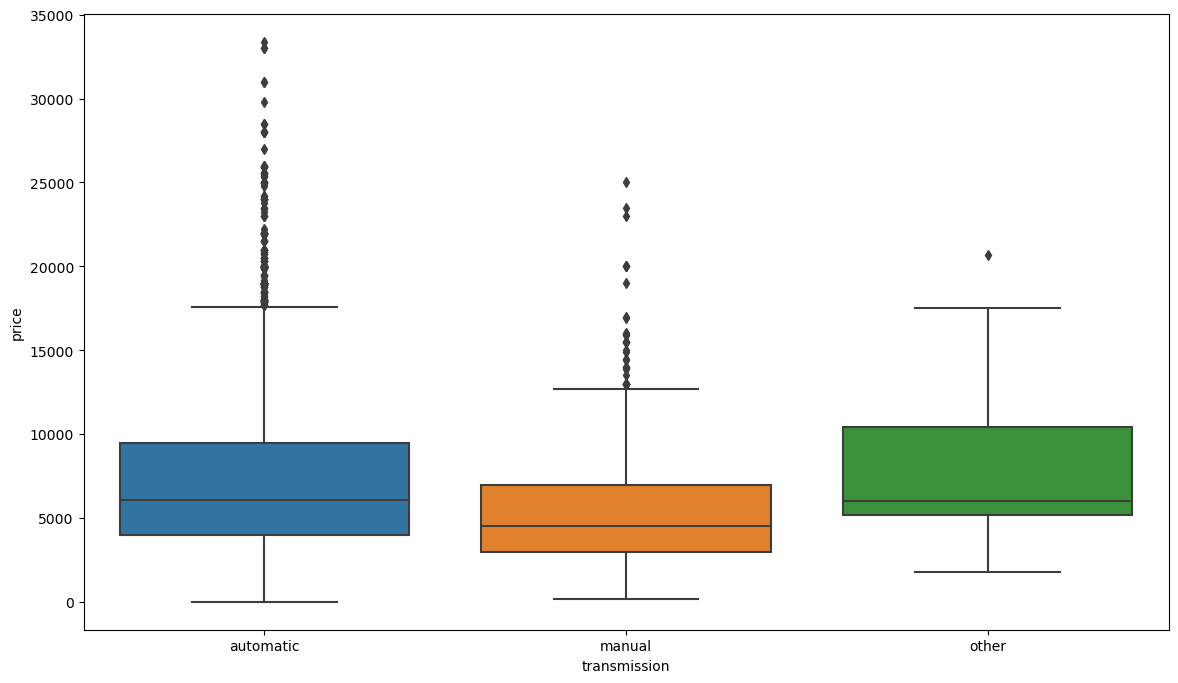

In [93]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='transmission', y='price',data=sedans)

here we have a different result for sedan type, there is a correlation between the price and transmission. averages price of automatic cars and 'other' higher than the uper price of manual cars so there is a correlation
price for sedan is influenced by the transmission of the car, maybe because it's more esay to drive a sedan with automatic transmission and because of that we can see the average price for automatic sedans higher than manual sedans 


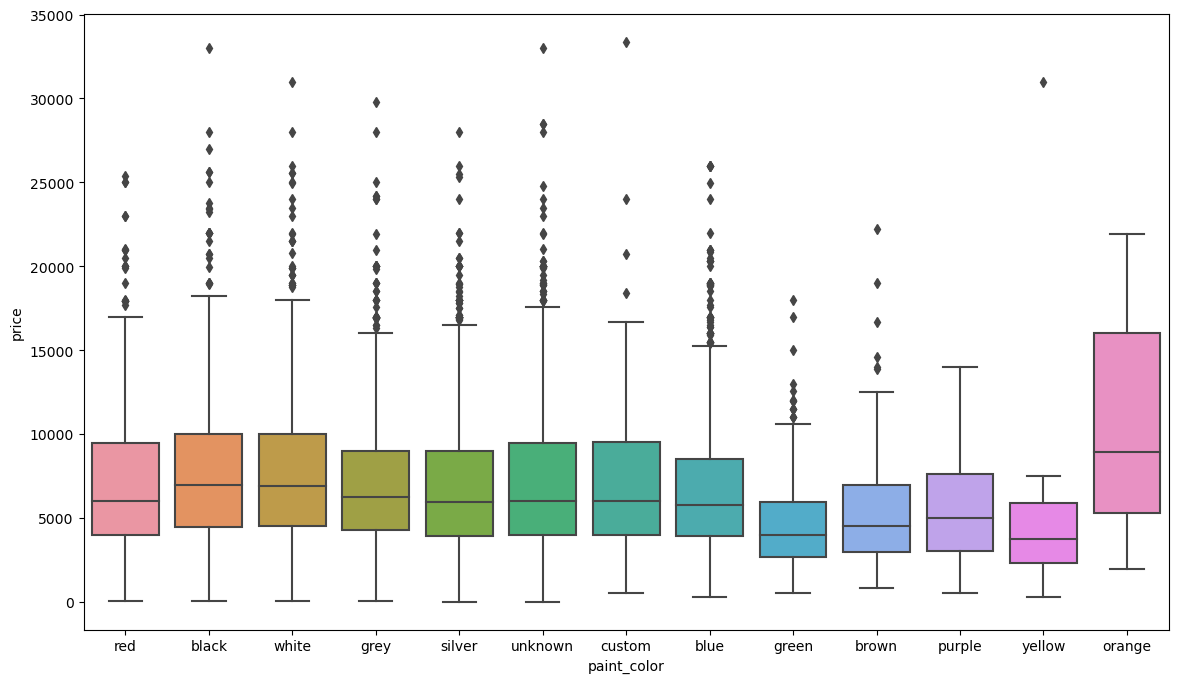

In [94]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='paint_color', y='price',data=sedans)

the price level for the most of the colors are the same, but for orange color the price level is much higher than any other color, that shows us that the price is less influenced by the color of the car

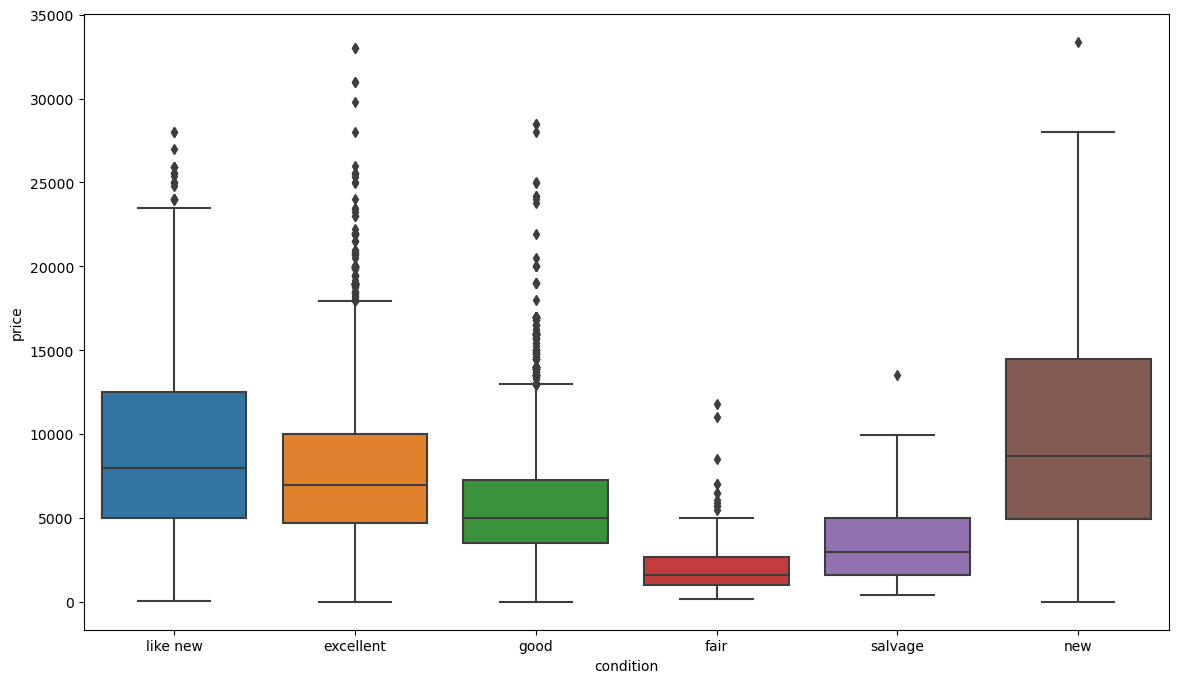

In [95]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x='condition', y='price',data=sedans)

in sedan type, we can see that the condition of the car absolutely affect the price, 'fair' and 'salvage' are in the lower level of price, but 'new','like new' and 'excellent' with higher average of price

## General conclusion

Findings 
We have tested the following five hypotheses on two types of vehicle:

There is correlation between the age of the vehicle and the price, as the age of the vehicle variable increases, the price decreases
The first hypothesis is accepted.<br>

Based on the mileage for the vehicle, we can see that there is a correlation, when the average mileage increase the price decrease.  Hpothesis accepted.<br>

There is correlation between the condition of the vehicle and the price, we can see 'fair' and 'salvage' are in the lower level of price, but 'new','like new' and 'excellent' with higher average of price
The third hypothesis is accepted.<br>

we can see the transmission of the vehicle affect differently according to the type of the vehicle<br>
when the buyer search for suv, the transmission does not affect the price<br>
but the transmission affects the price if the buyer is looking for sedans type.<br> 

There is no correlation between the color of the vehicle and the price, the price level for each color are the same , The first hypothesis is rejected.

